#### Import all required dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

##### Fetch housing data

In [2]:
housing_data = fetch_california_housing()
data = pd.DataFrame(housing_data.data)
target = pd.DataFrame(housing_data.target)

##### Review the data dimensionality

In [3]:
print("\x1B[4m\n*** Check feature and label column names ***\x1B[0m")
print('Features: ', housing_data.feature_names)
print('Target/Labels: ', housing_data.target_names)

print("\x1B[4m\n*** Check dimensionality(shape or size) of data ***\x1B[0m")
print("Size (Number of elements(Columns x rows) = {}".format(data.size))
print("Shape (Tuple representation of the Dataframe's dimensionality) = {}".format(data.shape))
print("ndim (int representing the number of axes/array dimensions) = {}".format(data.ndim))

print("\x1B[4m\n*** Check dimensionality of target/labels ***\x1B[0m")
print('Size = {}'.format(target.size))
print('Shape = {}'.format(target.shape))
print('ndim = {}'.format(target.ndim))


*** Check feature and label column names ***
Features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target/Labels:  ['MedHouseVal']

*** Check dimensionality(shape or size) of data ***
Size (Number of elements(Columns x rows) = 165120
Shape (Tuple representation of the Dataframe's dimensionality) = (20640, 8)
ndim (int representing the number of axes/array dimensions) = 2

*** Check dimensionality of target/labels ***
Size = 20640
Shape = (20640, 1)
ndim = 2


##### Display first 5 rows of the data against the label

In [4]:
labeled_data = pd.concat([data, target], axis = 1)
labeled_data.columns = np.concatenate((housing_data.feature_names, housing_data.target_names))
labeled_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##### Visualize data distribution with histogram

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

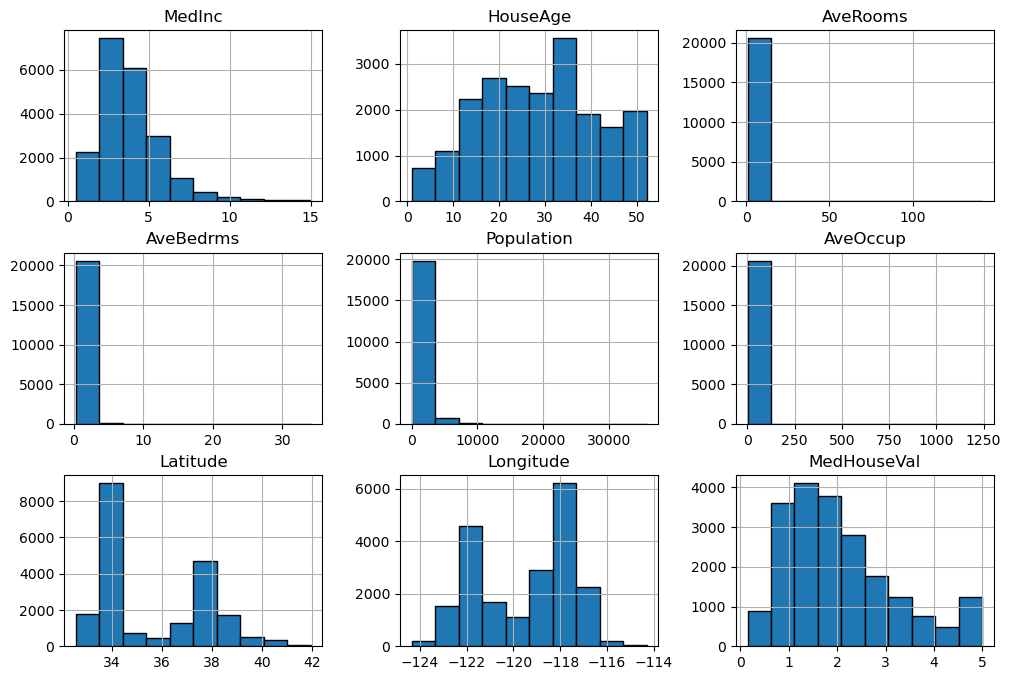

In [5]:
labeled_data.hist(figsize = (12,8), grid=True, edgecolor='black')

##### Visualize the correlation matrix

In [6]:
corr_matrix = labeled_data.corr()

# Display correlation with the target column
corr_matrix[housing_data.target_names[0]].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

<Axes: title={'center': 'Correlation between features and target'}>

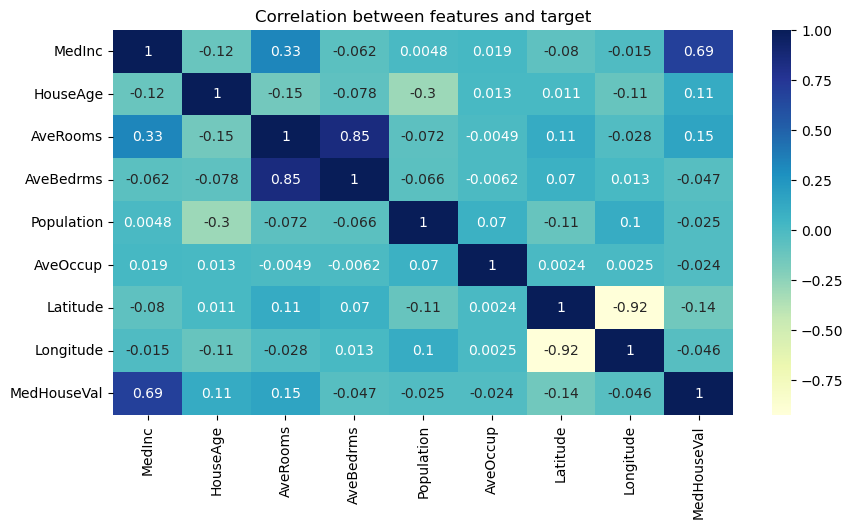

In [7]:
plt.figure(figsize = (10,5))
plt.title('Correlation between features and target')
sns.heatmap(corr_matrix, annot=True, cmap ="YlGnBu")

##### Split training and test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 42)

##### Train the model - Fitting Multiple Linear Regression To the Training Set

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Predict with the test set

In [10]:
y_pred = model.predict(X_test)
print('Predicted values: \n', y_pred)

Predicted values: 
 [[0.72412832]
 [1.76677807]
 [2.71151581]
 ...
 [1.72382152]
 [2.34689276]
 [3.52917352]]


##### Review the coefficients and intercep

In [11]:
model.coef_
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [[ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
  -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01]]
Intercept: 
 [-37.02782759]


##### Evaluate the metrics 

In [12]:
x_pred = model.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, x_pred)
mae_test = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE) for training set: {}'.format(mae_train))
print('Mean Absolute Error (MAE) for testing set: {} \n'.format(mae_test))

mse_train = metrics.mean_squared_error(y_train, x_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) for training set: {}'.format(mse_train))
print('Mean Squared Error (MSE) for testing set: {} \n'.format(mse_test))

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error (RMSE) for training set: {}'.format(rmse_train))
print('Root Mean Squared Error (RMSE) for testing set: {} \n'.format(rmse_test))

r2_train = metrics.r2_score(y_train, x_pred)
r2_test = metrics.r2_score(y_test, y_pred)
print('R-squared (Coefficient of determination) for training set: {}'.format(r2_train))
print('R-squared (Coefficient of determination) for testing set: {} \n'.format(r2_test))


Mean Absolute Error (MAE) for training set: 0.5295154304301841
Mean Absolute Error (MAE) for testing set: 0.5296964012919453 

Mean Squared Error (MSE) for training set: 0.5205522163645129
Mean Squared Error (MSE) for testing set: 0.5411287478470697 

Root Mean Squared Error (RMSE) for training set: 0.7214930466501481
Root Mean Squared Error (RMSE) for testing set: 0.7356145375446774 

R-squared (Coefficient of determination) for training set: 0.609873031052925
R-squared (Coefficient of determination) for testing set: 0.5910509795491345 

